# ICE 8
## Core Methods in Educational Data Mining

**Author**: Nicolas Dussaillant

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Visualize data

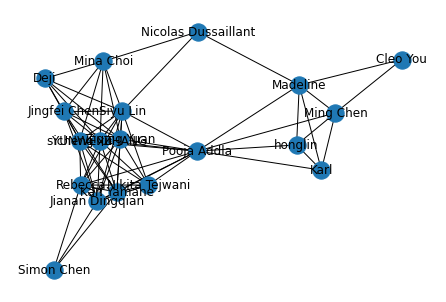

In [2]:
SNAdata = pd.read_csv("ICE8_Data.csv", index_col = 0)
G = nx.Graph(SNAdata)
nx.draw(G, with_labels = True)

### Network Statistics

Density

In [3]:
density = nx.density(G)

print('The edge density is: %.3f' % (density))

The edge density is: 0.415


Degree Centrality

In [5]:
degree = nx.degree(G)
pd.DataFrame(degree)

,0,1
0,Nicolas Dussaillant,3
1,Ming Chen,5
2,Rebecca,9
3,Nikita Tejwani,8
4,Simon Chen,3
5,Pooja Addla,12
6,honglin,4
7,Karl,4
8,sicheng xu,11
9,Jianan Dingqian,10


Closeness centrality

In [6]:
close = nx.closeness_centrality(G)
pd.DataFrame.from_dict(close, orient = 'index')

,0
Nicolas Dussaillant,0.529412
Ming Chen,0.514286
Rebecca,0.642857
Nikita Tejwani,0.620690
Simon Chen,0.428571
Pooja Addla,0.750000
honglin,0.500000
Karl,0.500000
sicheng xu,0.692308
Jianan Dingqian,0.666667


Betweenness centrality

In [7]:
between = nx.betweenness_centrality(G)
pd.DataFrame.from_dict(between, orient = 'index')

,0
Nicolas Dussaillant,0.028494
Ming Chen,0.043542
Rebecca,0.029879
Nikita Tejwani,0.000000
Simon Chen,0.000000
Pooja Addla,0.363663
honglin,0.000000
Karl,0.000000
sicheng xu,0.037340
Jianan Dingqian,0.042367


Community detection

In [8]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

c = list(greedy_modularity_communities(G))

print(len(c))

3


In [9]:
community_0 = sorted(c[0])
community_1 = sorted(c[1])
community_2 = sorted(c[2])

print(community_0)
print(community_1)
print(community_2)

['Deji', 'Jingfei Chen', 'Mina Choi', 'Nicolas Dussaillant', 'Siyu Lin', 'YUNWEI ZHANG', 'Ziqing Yuan', 'sicheng xu']
['Cleo You', 'Karl', 'Madeline', 'Ming Chen', 'Pooja Addla', 'honglin']
['Jianan Dingqian', 'Kan Yamane', 'Nikita Tejwani', 'Rebecca', 'Simon Chen']


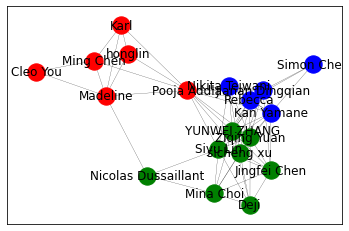

In [10]:
# Set seed (optional)
np.random.seed(123)

# Obtain the positions of the nodes
pos = nx.spring_layout(G)

# Print out all the nodes with color
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_0, node_color='green', label = True)
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_1, node_color='red', label = True)
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_2, node_color='blue', label = True)

# Print out the edges
nx.draw_networkx_edges(G, pos = pos, width = 0.2)

# Make sure the label is printed
nx.draw_networkx_labels(G, pos=pos)

# Show the plot so it supress the other networkx outputs
plt.show()

### Prettier Network

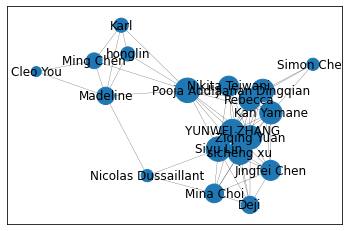

In [12]:
nx.draw_networkx_nodes(G, pos = pos, nodelist = dict(degree).keys(), node_size = [v * 50 for v in dict(degree).values()], label = True)
nx.draw_networkx_edges(G, pos = pos, width = 0.2)
nx.draw_networkx_labels(G, pos=pos)
plt.show()

Weigh size

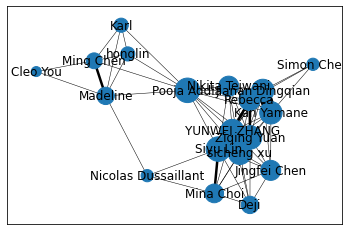

In [13]:
eWeight = nx.get_edge_attributes(G,'weight')

nx.draw_networkx_nodes(G, pos = pos, nodelist = dict(degree).keys(), node_size = [v * 50 for v in dict(degree).values()], label = True)
nx.draw_networkx_edges(G,pos, width = [5**e/10 for e in eWeight.values()])
nx.draw_networkx_labels(G, pos=pos)

plt.show()

Put everything together

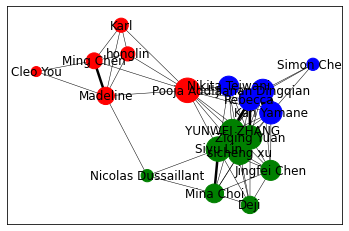

In [14]:
# Degrees of each community
community_0_degree = {c: dict(degree)[c] for c in community_0}
community_1_degree = {c: dict(degree)[c] for c in community_1}
community_2_degree = {c: dict(degree)[c] for c in community_2}


# Print out the nodes with color and size
nx.draw_networkx_nodes(G, pos = pos, 
                       nodelist=community_0,
                       node_color='green',
                       node_size = [v * 50 for v in community_0_degree.values()],
                       label = True)

nx.draw_networkx_nodes(G, pos = pos,
                       nodelist=community_1,
                       node_size = [v * 50 for v in community_1_degree.values()],
                       node_color='red', label = True)

nx.draw_networkx_nodes(G, pos = pos,
                       nodelist=community_2,
                       node_size = [v * 50 for v in community_2_degree.values()],
                       node_color='blue', label = True)

# Print out the edges with proper width
nx.draw_networkx_edges(G,pos, width = [5**e/10 for e in eWeight.values()])

# Make sure the label is printed
nx.draw_networkx_labels(G, pos=pos)

# Show the plot so it supress the other networkx outputs
plt.show()

## Implications and applications:

I think I can use SNA to:

1. Find people with things in common to form groups: Some social networks let people state their preferences for different things from a list of possibilities (hobbies, thoughts, interests, etc...), so it is possible to create groups of people with the most similar interests.
2. Find followers' loop: In social networks like Instagram and Twitter, people don't need to follow back other people, maybe there's a way to find using SNA loops of following people, something like A follows B, B follows C, and C follows A, and that'd be a loop.
3. Check within a certain social group, which person is the most sociable considering their friends in the group.
